# Structured data

In [60]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [61]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/stock/'

## Create datasets

You can download the datasets used [here](https://www.kaggle.com/c/titanic/data).

Feature Space:
* train: Training set provided by competition
* test: testing set

In [62]:
table_names = ['btc-bitstamp-2012-01-01_to_2018-01-08']

We'll be using the popular data manipulation framework `pandas`. Among other things, pandas allows you to manipulate tables/data frames in python as one would in a database.

We're going to go ahead and load all of our csv's as dataframes into the list `tables`.

In [63]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [64]:
from IPython.display import HTML

We can use `head()` to get a quick look at the contents of each table:
* train: Contains Passenger info such as Gender, Age, Ticket, Fare and whether Survived, the prediction variable
* test: Same as training table, w/o Survived


In [65]:
for t in tables: display(t.head())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


The following returns summarized aggregate information to each table accross each field.

In [66]:
for t in tables: display(DataFrameSummary(t).summary())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.16106e+06,3.16106e+06,3.16106e+06,3.16106e+06,3.16106e+06,3.16106e+06,3.16106e+06,3.16106e+06
mean,1.42034e+09,963.8,964.655,962.787,963.793,11.1296,9835.7,963.717
std,5.49194e+07,2260.8,2263.64,2257.31,2260.79,35.9115,53319.3,2260.51
min,1.32532e+09,3.8,3.8,1.5,1.5,0,0,3.8
25%,1.37273e+09,110.99,111,110.92,110.99,0.446709,66.3664,110.982
50%,1.42015e+09,378.67,378.88,378.39,378.66,2.07566,365.32,378.645
75%,1.46795e+09,658.39,659,657.86,658.44,8.83241,2660.46,658.42
max,1.51537e+09,19665.8,19666,19650,19665.8,5853.85,5.14793e+06,19663.3
counts,3161057,3161057,3161057,3161057,3161057,3161057,3161057,3161057
uniques,3161057,322563,302500,318358,317580,1576051,1912214,1425521


## Data Cleaning / Feature Engineering

As a structured data problem, we necessarily have to go through all the cleaning and feature engineering, even though we're using a neural network.

In [67]:
train= tables[0]

In [68]:
len(train)

3161057

Time modifications

In [69]:
#convert to date objects
train["Timestamp"] = pd.to_datetime(train["Timestamp"], unit='s')
train['hour'] = train.Timestamp.dt.hour;
train['minute'] = train.Timestamp.dt.minute;
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,hour,minute
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,52
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,53
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,54
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,55
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,56


In [70]:
#shift close prices forward
train['futureClose'] = train['Close'].shift(-1)

In [71]:
#test
# testTrain = train[-5:]
# testTrain.apply(getTarget, axis=1)
# testTrain['action'] = (testTrain['futureClose'] > testTrain['Close'])
# testTrain = train[-5:]
# testTrain

# SET DEPENDENT VARIABLE ACTION
train['action'] = (train['futureClose'] > train['Close'])
train.action = train.action.astype(int)
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,hour,minute,futureClose,action
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,52,4.39,0
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,53,4.39,0
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,54,4.39,0
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,55,4.39,0
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,7,56,4.39,0


convert the prediction variable to type integer

In [72]:
train.action = train.action.astype(int)

In [73]:
# May need to clean data and handle missing values

# add all date time values
add_datepart(train, "Timestamp", drop=False)

# edit columns

train["VolumeBTC"] = train["Volume_(BTC)"]
train.drop('Volume_(BTC)',1,inplace=True)
train["VolumeCurrency"] = train["Volume_(Currency)"]
train.drop('Volume_(Currency)',1,inplace=True)
train["WeightedPrice"] = train["Weighted_Price"]
train.drop('Weighted_Price',1,inplace=True)

# delete unused columns
train.drop('VolumeCurrency',1,inplace=True)
train.drop('futureClose',1,inplace=True)

train.reset_index(inplace=True)
train.head()

,index,Timestamp,Open,High,Low,Close,hour,minute,action,TimestampYear,...,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,TimestampIs_quarter_end,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed,VolumeBTC,WeightedPrice
0,0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,7,52,0,2011,...,365,True,False,True,False,True,False,1325317920,0.455581,4.39
1,1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,7,53,0,2011,...,365,True,False,True,False,True,False,1325317980,0.455581,4.39
2,2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,7,54,0,2011,...,365,True,False,True,False,True,False,1325318040,0.455581,4.39
3,3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,7,55,0,2011,...,365,True,False,True,False,True,False,1325318100,0.455581,4.39
4,4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,7,56,0,2011,...,365,True,False,True,False,True,False,1325318160,0.455581,4.39


remove all 0 values 

In [74]:
train = train[train.Open!=0]
train = train[train.High!=0]
train = train[train.Low!=0]
train = train[train.Close!=0]
train = train[train.WeightedPrice!=0]

In [75]:
# trim to a million records for now
# TODO: remove this
train = train[-100000:]
train.reset_index(inplace=True)

In [76]:
train.to_feather(f'{PATH}train')

We fill in missing values to avoid complications with `NA`'s. `NA` (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary *signal value* that doesn't otherwise appear in the data.

## Create features

In [77]:
train = pd.read_feather(f'{PATH}train')

In [78]:
train.head().T.head(40)

,0,1,2,3,4
level_0,3061057,3061058,3061059,3061060,3061061
index,3061057,3061058,3061059,3061060,3061061
Timestamp,2017-10-30 13:21:00,2017-10-30 13:22:00,2017-10-30 13:23:00,2017-10-30 13:24:00,2017-10-30 13:25:00
Open,6155.01,6167.93,6172.24,6172.56,6172.29
High,6172.21,6172.31,6175.94,6176.11,6176.14
Low,6144.66,6167.86,6154.33,6163.76,6164.11
Close,6168.03,6172.31,6163.76,6172.29,6174.74
hour,13,13,13,13,13
minute,21,22,23,24,25
action,1,0,1,1,0


In [79]:
display(DataFrameSummary(train).summary())

,level_0,index,Timestamp,Open,High,Low,Close,hour,minute,action,...,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,TimestampIs_quarter_end,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed,VolumeBTC,WeightedPrice
count,100000,100000,NaN,100000,100000,100000,100000,100000,100000,100000,...,100000,NaN,NaN,NaN,NaN,NaN,NaN,100000,100000,100000
mean,3.11106e+06,3.11106e+06,NaN,11632.6,11647.3,11614.5,11632.5,11.5425,29.5038,0.47874,...,300.981,NaN,NaN,NaN,NaN,NaN,NaN,1.51237e+09,11.5298,11631.1
std,28867.7,28867.7,NaN,4015.08,4022.37,4005.96,4015.29,6.92491,17.3176,0.49955,...,100.9,NaN,NaN,NaN,NaN,NaN,NaN,1.73206e+06,19.8197,4014.51
min,3.06106e+06,3.06106e+06,NaN,5561.16,5572,5555.55,5561.16,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1.50937e+09,0.00058886,5560.04
25%,3.08606e+06,3.08606e+06,NaN,7632.43,7642.7,7623.9,7635.4,6,15,0,...,313,NaN,NaN,NaN,NaN,NaN,NaN,1.51087e+09,1.84263,7633.34
50%,3.11106e+06,3.11106e+06,NaN,11417,11436.1,11400,11416.5,12,30,0,...,331,NaN,NaN,NaN,NaN,NaN,NaN,1.51237e+09,5.1801,11414.7
75%,3.13606e+06,3.13606e+06,NaN,15100,15128,15069.9,15100,18,45,1,...,348,NaN,NaN,NaN,NaN,NaN,NaN,1.51387e+09,12.8569,15098
max,3.16106e+06,3.16106e+06,NaN,19665.8,19666,19650,19665.8,23,59,1,...,365,NaN,NaN,NaN,NaN,NaN,NaN,1.51537e+09,574.994,19663.3
counts,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
uniques,100000,100000,100000,72851,63717,70166,70698,24,60,2,...,71,2,2,2,2,2,2,100000,99398,99223


Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [80]:
train.head()

,level_0,index,Timestamp,Open,High,Low,Close,hour,minute,action,...,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,TimestampIs_quarter_end,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed,VolumeBTC,WeightedPrice
0,3061057,3061057,2017-10-30 13:21:00,6155.01,6172.21,6144.66,6168.03,13,21,1,...,303,False,False,False,False,False,False,1509369660,5.619913,6165.084137
1,3061058,3061058,2017-10-30 13:22:00,6167.93,6172.31,6167.86,6172.31,13,22,0,...,303,False,False,False,False,False,False,1509369720,12.598996,6170.010354
2,3061059,3061059,2017-10-30 13:23:00,6172.24,6175.94,6154.33,6163.76,13,23,1,...,303,False,False,False,False,False,False,1509369780,12.865922,6168.538794
3,3061060,3061060,2017-10-30 13:24:00,6172.56,6176.11,6163.76,6172.29,13,24,1,...,303,False,False,False,False,False,False,1509369840,21.191745,6166.860713
4,3061061,3061061,2017-10-30 13:25:00,6172.29,6176.14,6164.11,6174.74,13,25,0,...,303,False,False,False,False,False,False,1509369900,14.460127,6174.173676


Identify categorical vs continuous variables.  PassengerId serves as the unique identifier for each row.

In [81]:
cat_vars = ['TimestampYear', 'TimestampMonth', 'TimestampWeek', 'TimestampDay', 'hour','minute', 'TimestampDayofweek', 'TimestampDayofyear', 
'TimestampIs_month_end', 'TimestampIs_month_start', 'TimestampIs_quarter_end', 'TimestampIs_quarter_start', 
'TimestampIs_year_end', 'TimestampIs_year_start', 'TimestampElapsed']

contin_vars = ['Open', 'Close','High', 'Low', 'VolumeBTC', 'WeightedPrice']

index='Timestamp'
dep = 'action'
n = len(train); n
   

100000

In [82]:
train = train[cat_vars+contin_vars+[dep, index]].copy()

In [83]:
# test[dep] = 0
# test = test[cat_vars+contin_vars+[dep, index]].copy()

In [84]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()

In [85]:
# TODO: need to add this back
# apply_cats(test, train)

In [86]:
for v in contin_vars:
    train[v] = train[v].astype('float32')
#     test[v] = test[v].astype('float32')

In [87]:
samp_size = n
train_samp = train.set_index(index)
n

100000

We can now process our data...

In [88]:
train_samp.head(2)

,TimestampYear,TimestampMonth,TimestampWeek,TimestampDay,hour,minute,TimestampDayofweek,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,...,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed,Open,Close,High,Low,VolumeBTC,WeightedPrice,action
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-30 13:21:00,2017,10,44,30,13,21,0,303,False,False,...,False,False,1509369660,6155.009766,6168.029785,6172.209961,6144.660156,5.619913,6165.083984,1
2017-10-30 13:22:00,2017,10,44,30,13,22,0,303,False,False,...,False,False,1509369720,6167.930176,6172.310059,6172.310059,6167.859863,12.598995,6170.010254,0


In [89]:
df, y, nas, mapper = proc_df(train_samp, dep, do_scale=True)

In [90]:
y.shape


(100000,)

In [91]:
# df_test, _, nas, mapper = proc_df(test, dep, do_scale=True, 
#                                   mapper=mapper, na_dict=nas)

For some reason, nas were found for Fare_log when there was not an NA value and it caused the code to fail downstream.  Here I inspected the value and then just removed the column :)

In [92]:
nas
# df_test.Fare_log_na.unique()
# df_test.loc[df_test.Fare_log_na!=True]

{}

In [93]:
nas={}

In [94]:
# df_test = df_test.drop(['Fare_log_na'], axis=1)

In [95]:
df.head(2)

,TimestampYear,TimestampMonth,TimestampWeek,TimestampDay,hour,minute,TimestampDayofweek,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,...,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed,Open,Close,High,Low,VolumeBTC,WeightedPrice
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-30 13:21:00,1,2,3,30,14,22,1,9,1,1,...,1,1,1,1,-1.364252,-1.360912,-1.361169,-1.365425,-0.298185,-1.361561
2017-10-30 13:22:00,1,2,3,30,14,23,1,9,1,1,...,1,1,1,2,-1.361034,-1.359846,-1.361145,-1.359633,0.053945,-1.360334


In [96]:
# df_test.head(2)

Rake the last 10% of rows as our validation set.

In [97]:

train_ratio = 0.98
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))
#val_idx = list(range(0, len(df)-train_size))
#val_idx = get_cv_idxs(n, val_pct=0.1)

In [98]:
len(val_idx)

2000

## DL

We're ready to put together our models.

We can create a ModelData object directly from our data frame. Is_Reg is set to False to turn this into a classification problem (from a regression).  Is_multi is set False because there is only one predicted label (Survived) per row (of type int).  

In [99]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype('int'), cat_flds=cat_vars, bs=64,
                                      is_reg=False,is_multi=False)
# ,test_df=df_test

Some categorical variables have a lot more levels than others.

In [100]:
cat_sz = [(c, len(train_samp[c].cat.categories)+1) for c in cat_vars]

In [101]:
cat_sz

[('TimestampYear', 3),
 ('TimestampMonth', 5),
 ('TimestampWeek', 12),
 ('TimestampDay', 32),
 ('hour', 25),
 ('minute', 61),
 ('TimestampDayofweek', 8),
 ('TimestampDayofyear', 72),
 ('TimestampIs_month_end', 3),
 ('TimestampIs_month_start', 3),
 ('TimestampIs_quarter_end', 3),
 ('TimestampIs_quarter_start', 3),
 ('TimestampIs_year_end', 3),
 ('TimestampIs_year_start', 3),
 ('TimestampElapsed', 100001)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [102]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [103]:
emb_szs

[(3, 2),
 (5, 3),
 (12, 6),
 (32, 16),
 (25, 13),
 (61, 31),
 (8, 4),
 (72, 36),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (100001, 50)]

Check if cude is available

In [104]:
torch.cuda.is_available()

True

In [105]:
len(df.columns)-len(cat_vars)

6

In [106]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),0.06, 2, [100,50], [0.03,0.06],None,True)

In [107]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(5, 3)
    (2): Embedding(12, 6)
    (3): Embedding(32, 16)
    (4): Embedding(25, 13)
    (5): Embedding(61, 31)
    (6): Embedding(8, 4)
    (7): Embedding(72, 36)
    (8): Embedding(3, 2)
    (9): Embedding(3, 2)
    (10): Embedding(3, 2)
    (11): Embedding(3, 2)
    (12): Embedding(3, 2)
    (13): Embedding(3, 2)
    (14): Embedding(100001, 50)
  )
  (lins): ModuleList(
    (0): Linear(in_features=179, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=50, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=50, out_features=2, bias=True)
  (emb_drop): Dropout(p=0.06)
  (drops): ModuleList(
    (0): Dropout(p=0.03)
    (1): Dropout(p=0.06)
  )
  (bn): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True)
)

 78%|███████▊  | 1198/1532 [00:10<00:02, 114.60it/s, loss=1.84] 

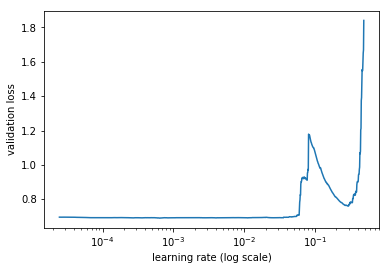

In [108]:
m.lr_find()
m.sched.plot(100)
lr = 1e-4

In [109]:
m.fit(lr, 3)

epoch      trn_loss   val_loss                                  
    0      0.691447   0.691342  
    1      0.68343    0.691204                                  
    2      0.389119   0.859231                                  


[array([0.85923])]

In [110]:
m.fit(lr, 5, cycle_len=1)

epoch      trn_loss   val_loss                                  
    0      0.115138   1.080416  
    1      0.069256   1.246779                                   
    2      0.036172   1.394102                                   
    3      0.019118   1.522038                                   
    4      0.009711   1.643932                                    


[array([1.64393])]

In [111]:
m.fit(lr, 3, cycle_len=4, cycle_mult=2 )

epoch      trn_loss   val_loss                                    
    0      0.005373   1.94363   
    1      0.00146    1.966889                                     
    2      0.00042    2.024954                                     
    3      0.000347   2.00724                                      
    4      0.000325   2.192527                                     
    5      2.8e-05    2.292824                                     
    6      9e-06      2.369139                                     
    7      2e-05      2.446298                                     
    8      3e-06      2.409294                                     
    9      2e-06      2.490639                                     
    10     2e-06      2.4862                                       
    11     3e-06      2.470778                                     
    12     2.4e-05    2.851688                                     
    13     1e-06      2.649267                                     
    14     0.0  

[array([2.89799])]

In [112]:
m.save('btcBinaryClassificationModel')

In [113]:
m.load('btcBinaryClassificationModel')

## Validation

In [114]:
(x,y1)=m.predict_with_targs()

Predicted vs Validation

In [115]:
(np.argmax(x,axis=1),y1)

(array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1]),
 array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ..., 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0]))

In [116]:
y1.shape


(2000,)

In [117]:
val = train.iloc[val_idx]
val[[index,dep]]
valpred = pd.DataFrame({'Timestamp':val.Timestamp, 'action':val.action, 'predicted':np.argmax(x,axis=1)})[['Timestamp', 'action','predicted']]
valpred.head(10)

,Timestamp,action,predicted
98000,2018-01-06 14:41:00,1,1
98001,2018-01-06 14:42:00,0,0
98002,2018-01-06 14:43:00,1,1
98003,2018-01-06 14:44:00,0,0
98004,2018-01-06 14:45:00,1,1
98005,2018-01-06 14:46:00,0,0
98006,2018-01-06 14:47:00,0,0
98007,2018-01-06 14:48:00,0,1
98008,2018-01-06 14:49:00,1,1
98009,2018-01-06 14:50:00,0,1


Calculate the percent accuracy

In [118]:
predicted = valpred.loc[valpred.action == valpred.predicted]
accuracy = len(predicted)/len(val)
accuracy

0.512

## Test and Kaggle Submission

In [85]:
np.argmax(m.predict(True), axis =1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, ..., 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

In [103]:
sub = pd.DataFrame({'Timestamp':test.index, 'action':np.argmax(m.predict(True), axis =1)})[['Timestamp', 'action']]
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [87]:
csv_fn=f'{PATH}/tmp/sub4.csv'
sub.to_csv(csv_fn, index=False)
FileLink(csv_fn)

/home/paperspace/fastai/courses/dl1/data/titanic/tmp/sub4.csv

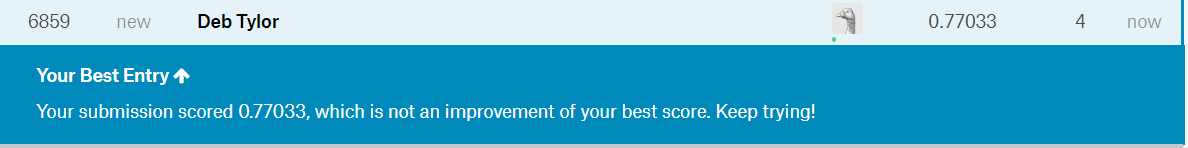


## RF

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, y)

In [110]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

Accuracy of 87% on the validation set using a Random Forest Regressor.

In [139]:
def PredtoClass(a):
    pred_class = []
    for i in range(len(a)):
        if a[i]<.5:
            pred_class.append(0)
        else:
            pred_class.append(1)
    return pred_class
def accuracy(preds, y_val):
    return  sum(1- abs(PredtoClass(preds) - y_val))/len(y_val)

In [141]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, accuracy(preds, y_val)

(0.8133054096609964,
 0.47265045085703417,
 0.42569619049697704,
 0.8666666666666667)

In [142]:
preds_test = m.predict(df_test.values)

In [146]:
sub = pd.DataFrame({'PassengerId':test.index, 'Survived':PredtoClass(preds_test)})[['PassengerId', 'Survived']]
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [147]:
csv_fn=f'{PATH}/tmp/RFsub5.csv'
sub.to_csv(csv_fn, index=False)
FileLink(csv_fn)

/home/paperspace/fastai/courses/dl1/data/titanic/tmp/RFsub5.csv

This random forest submission also received a score of 0.77033, exactly the same as the nn score, despite the 86.7% validation set accuracy.